In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Replacing null value with 0
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
# changing data types from obj to float
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.duplicated().sum()

0

In [9]:
# changing the data type of SeniorCitizen from into to varchar
df["SeniorCitizen"] = df["SeniorCitizen"].astype("string")

# replacing 0 with "False" & 1 with "True"
df["SeniorCitizen"] = df["SeniorCitizen"].replace("0","False")
df["SeniorCitizen"] = df["SeniorCitizen"].replace("1","True")

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,False,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,False,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,False,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df["customerID"].duplicated().sum()

0

In [12]:
'''
Same as above but using function.

def conv(value):
  if value == 1:
    return "yes"
  else:
    return "no"

df[ 'SeniorCitizen'] df["SeniorCitizen"].apply(conv)
'''


'\nSame as above but using function.\n\ndef conv(value):\n  if value == 1:\n    return "yes"\n  else:\n    return "no"\n\ndf[ \'SeniorCitizen\'] df["SeniorCitizen"].apply(conv)\n'

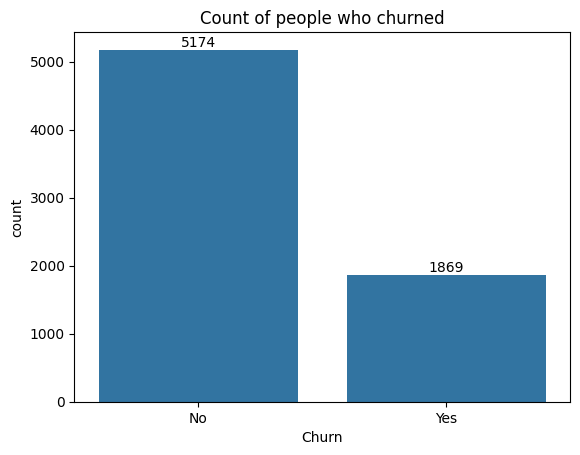

In [13]:
# Count of people who churned via plot
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0]) # Changed 'bar_lable' to 'bar_label'
plt.title("Count of people who churned")
plt.show()

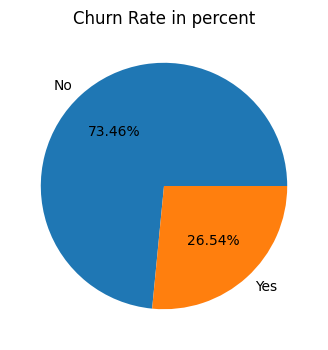

In [14]:
plt.figure(figsize = (4,4))
gb = df.groupby('Churn').agg({'Churn' : 'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Churn Rate in percent")
plt.show()

**From above pie chart we can conclude that 26.54% of our customer are churned out.**

**Now let's explore the reason behind it!**

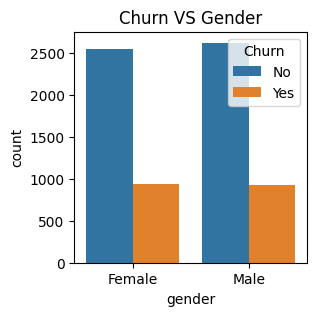

In [15]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'gender', data = df, hue = 'Churn')
plt.title('Churn VS Gender') # Changed 'lable' to 'title' to set the title of the plot.
plt.show()



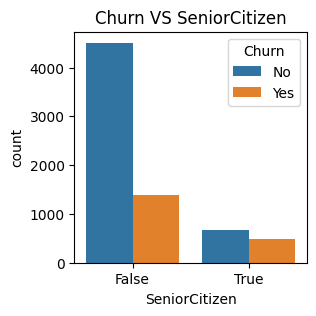

In [16]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'SeniorCitizen', data = df, hue = 'Churn')
plt.title('Churn VS SeniorCitizen') # Changed 'lable' to 'title' to set the title of the plot.
plt.show()

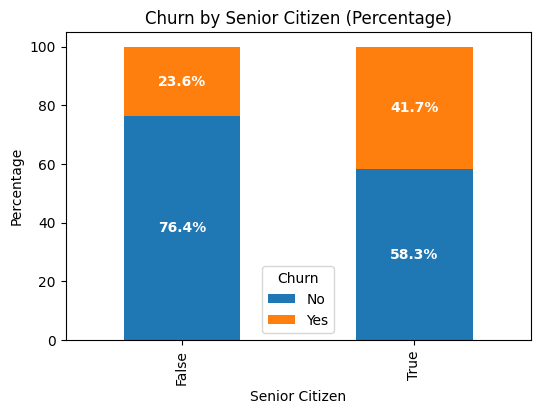

In [17]:
# Calculate percentages
group_counts = df.groupby(["SeniorCitizen", "Churn"]).size().unstack(fill_value=0)
group_percentages = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart with default colors
ax = group_percentages.plot(kind="bar", stacked=True, figsize=(6, 4), color=["#1f77b4", "#ff7f0e"])

# Add percentage labels
for i, bars in enumerate(group_percentages.values):
    for j, val in enumerate(bars):
        plt.text(i, bars[:j].sum() + val / 2, f"{val:.1f}%",
                 ha="center", va="center", color="white", fontweight="bold")

# Customize the plot
plt.title("Churn by Senior Citizen (Percentage)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.show()


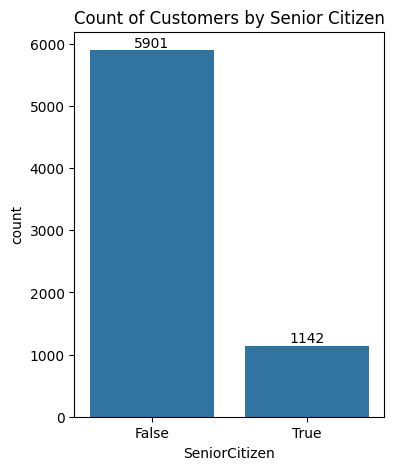

In [18]:
plt.figure(figsize=(4,5)) # Corrected the syntax to pass figsize as a parameter.
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers [0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

**Comparative a greated pecentage of people in senior citizen category have chured.**

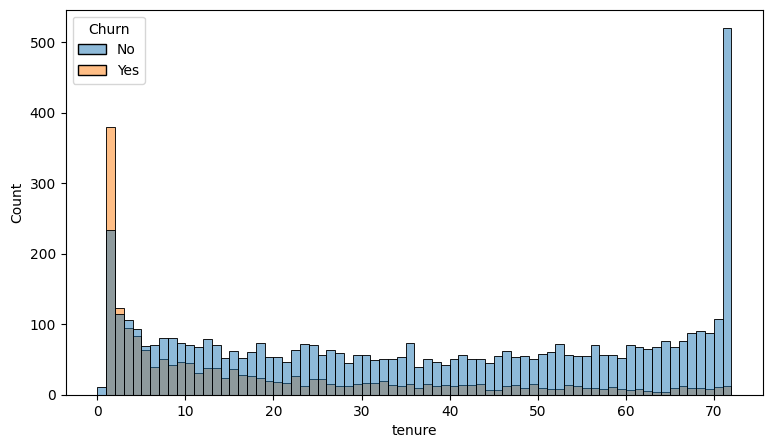

In [19]:
plt.figure(figsize=(9,5))
sns.histplot(x = "tenure", data = df, bins = 72, hue = 'Churn')
plt.show()

**People who have used our services for a long time have stayed and people who have used our sevices 1 or 2 months have churned**

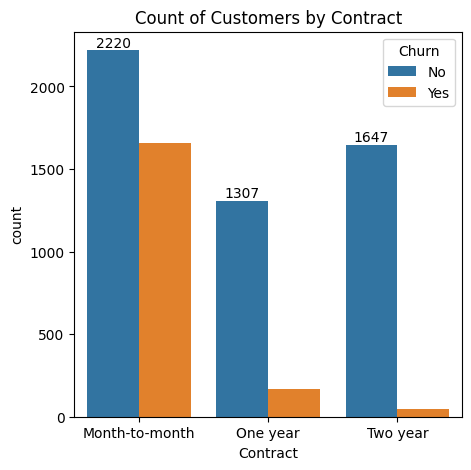

In [20]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Contract", data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

**People who have used our services for a long term i.e. 1+ year have stayed as compared to people who have used our sevices 1 or 2 months have churned**

In [21]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

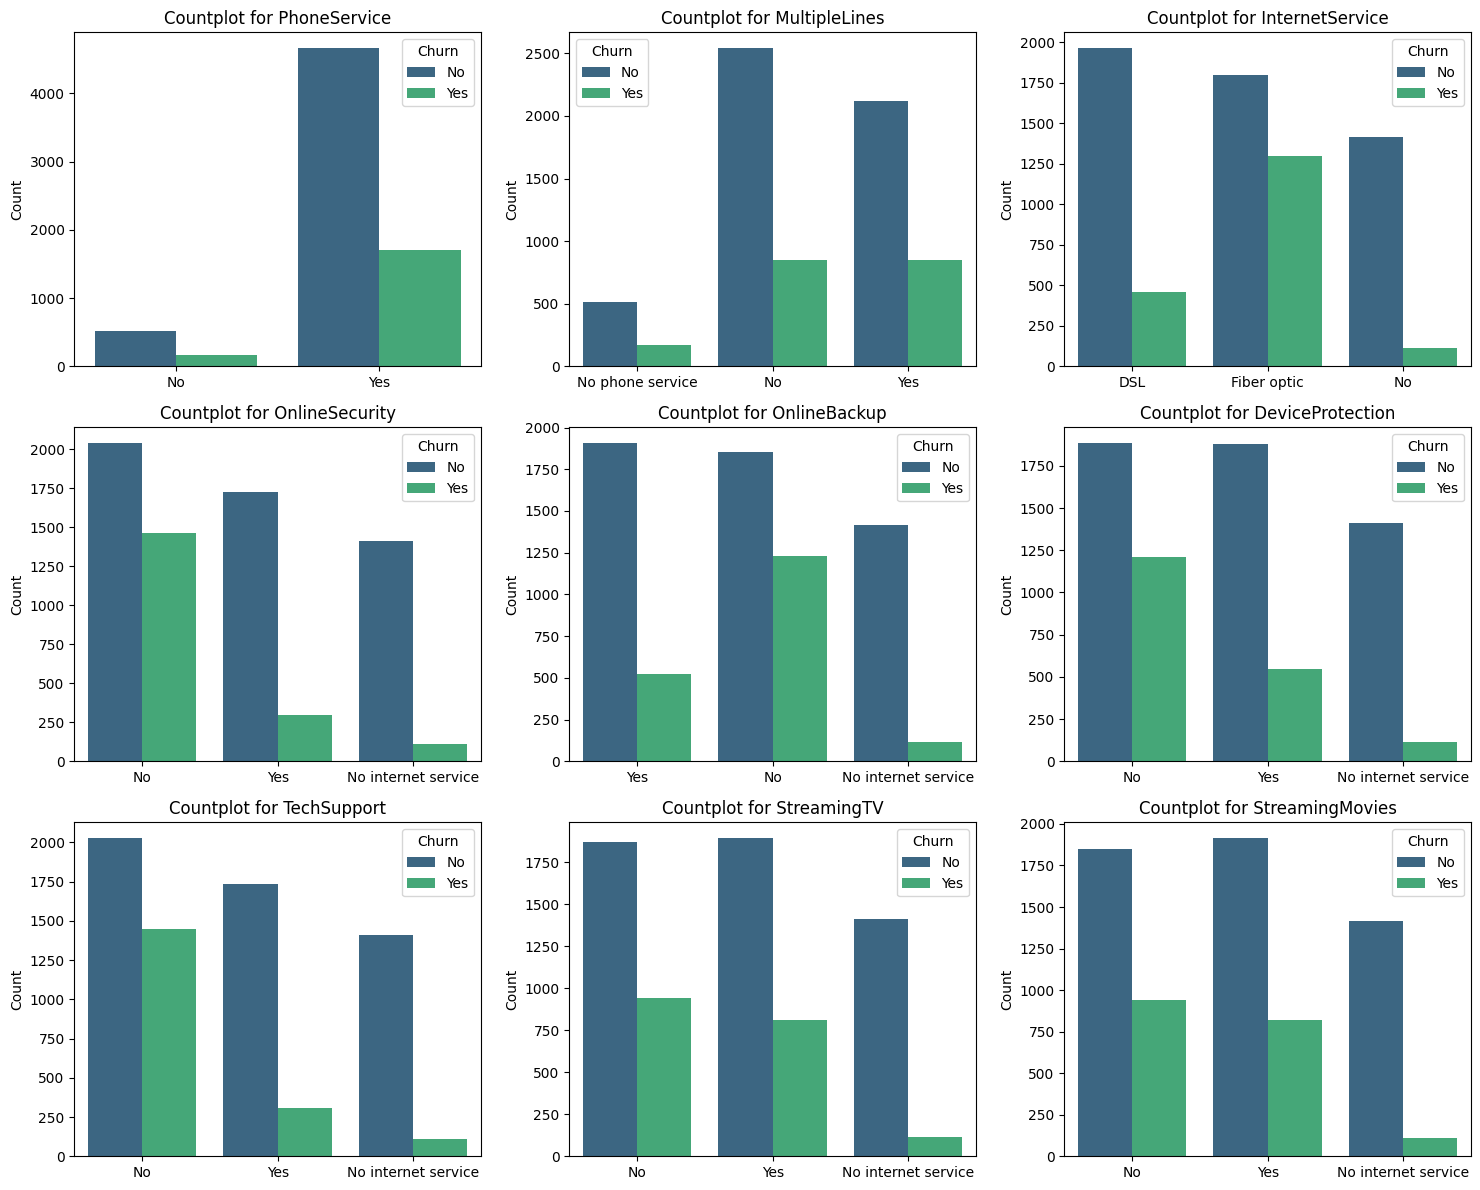

In [23]:
# List of columns
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', # Removed the space from 'Device Protection'
           'TechSupport', 'StreamingTV', 'StreamingMovies'] # Removed the space from 'Streaming TV' and 'Streaming Movies'


# Set up the figure size and grid layout
plt.figure(figsize=(15, 12))
rows = (len(columns) + 2) // 3  # Calculate rows for a 3-column layout

# Loop through each column and create a countplot
for i, col in enumerate(columns):
    plt.subplot(rows, 3, i + 1)
    sns.countplot(x=col, data=df, palette='viridis', hue = df['Churn'])
    plt.title(f"Countplot for {col}")
    plt.xlabel('')
    plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

**People who are churning for the following reasons that we need to work on:**

1. Using fiber optics.
2. No online security.
3. No online backup
4. No device protetion
5. No Tech-support
6. No Streaming TV
7. No streaming movies.

The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly
DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV,
churn rates are noticeably higher when these services are not used or are unavailable.


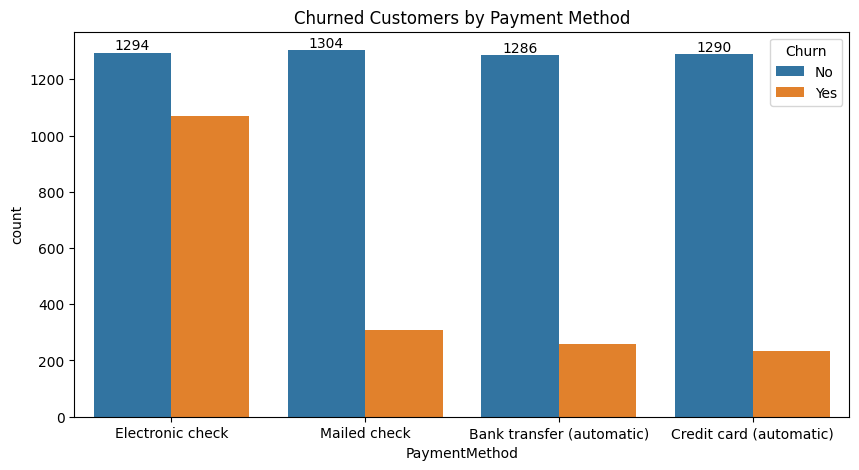

In [30]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned Customers by Payment Method")
plt.show()

**Customer's making payments using "electronic check" method are likely to be churned.**